In [110]:
"""
HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.
HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.
CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.
BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).
Smoker : Indicates if the person has smoked at least 100 cigarettes.
Stroke : Indicates if the person has a history of stroke.
Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.
PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.
Fruits : Indicates if the person consumes 1 or more fruit(s) daily.
Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.
HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.
AnyHealthcare : Indicates if the person has any form of health insurance.
NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.
GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).
Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.
PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.
DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.
Sex : Indicates the gender of the person, where 0 is female and 1 is male.
Age : Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.
Education : Indicates the highest year of school completed, with 0 being never attended or kindergarten only and 6 being, having attended 4 years of college or more.
Income : Indicates the total household income, ranging from 1 (at least $10,000) to 6 ($75,000+)
"""

'\nHighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.\nHighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.\nCholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.\nBMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).\nSmoker : Indicates if the person has smoked at least 100 cigarettes.\nStroke : Indicates if the person has a history of stroke.\nDiabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.\nPhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.\nFruits : Indicates if the person consumes 1 or more fruit(s) daily.\nVeggies : Indicates if the person consumes 1 or more vegetable(s) daily.\nHvyAlcoholConsump : Indicates if 

In [111]:
#Import Necessary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import KFold ,cross_val_score ,GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [112]:
# Read Data
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
#https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

In [113]:
# is there any nan value 
data.isna().sum().sum()

0

In [114]:
# is there any duplicated data 
print(data.duplicated().sum())
#https://www.kaggle.com/code/mahmoudlimam/undersampling-dimensionality-reduction
# delete duplicated data 
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

23899
0


In [115]:
# check row and colums numbers
data.shape

(229781, 22)

In [116]:
# check all columns
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [117]:
#take a look data
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [118]:
# Change value for see graph result better 
data.loc[data["HeartDiseaseorAttack"]==0,"HeartDiseaseorAttack"] = "No"
data.loc[data["HeartDiseaseorAttack"]==1,"HeartDiseaseorAttack"] = "Yes"

C:\Users\Samet\AppData\Local\Temp\ipykernel_6828\967951033.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["HeartDiseaseorAttack"]==0,"HeartDiseaseorAttack"] = "No"


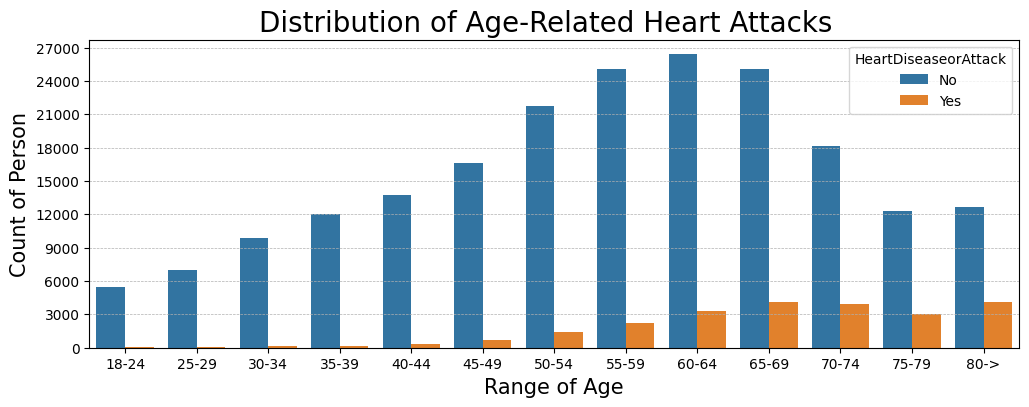

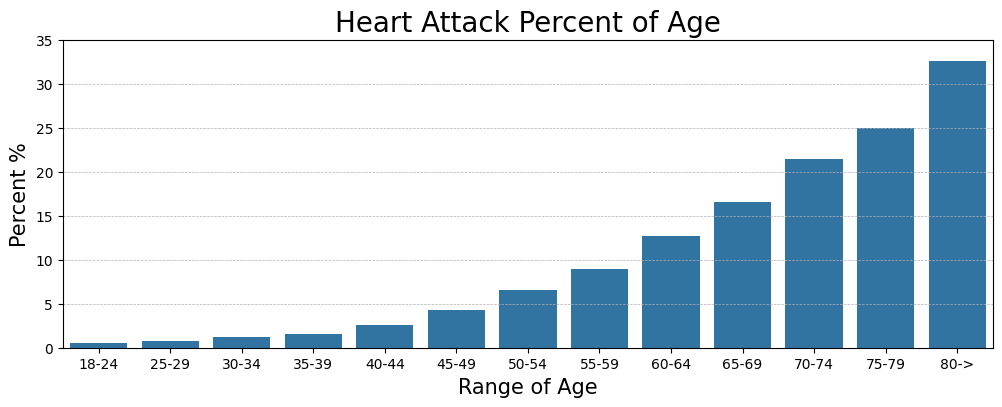

In [119]:
#age distubition
column = "Age"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
    "18-24","25-29","30-34",
    "35-39","40-44","45-49",
    "50-54","55-59","60-64",
    "65-69","70-74","75-79",
    "80->"]
grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,30000,3000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)
plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,40,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

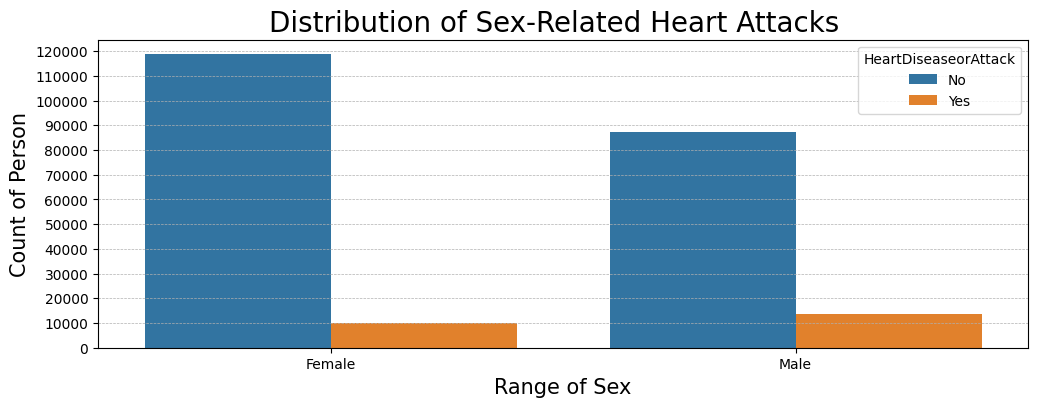

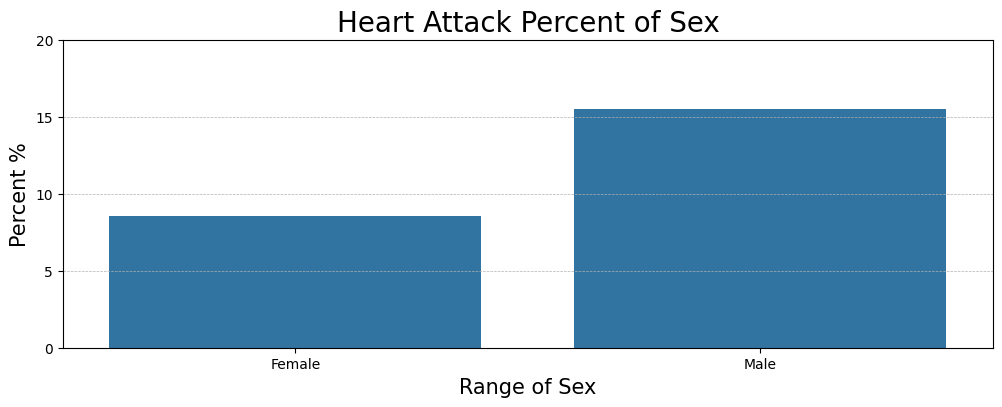

In [120]:
#gender distubition
column = "Sex"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
    "Female","Male"
]
grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,130000,10000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,25,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

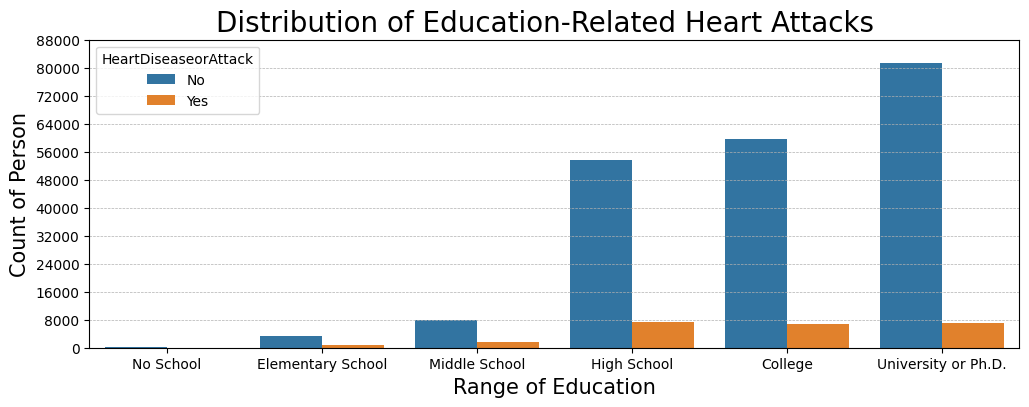

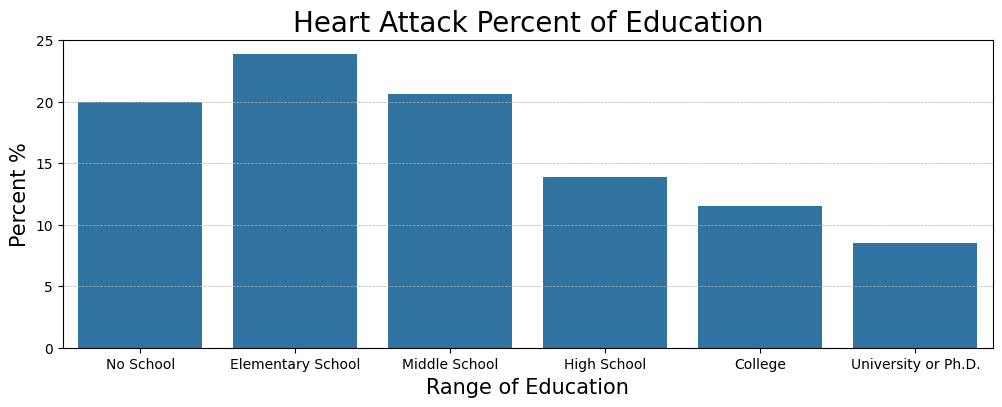

In [121]:
#educatin distubition
column = "Education"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No School",
            "Elementary School",
            "Middle School",
            "High School",
            "College",
            "University or Ph.D.",

]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,90000,8000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,30,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

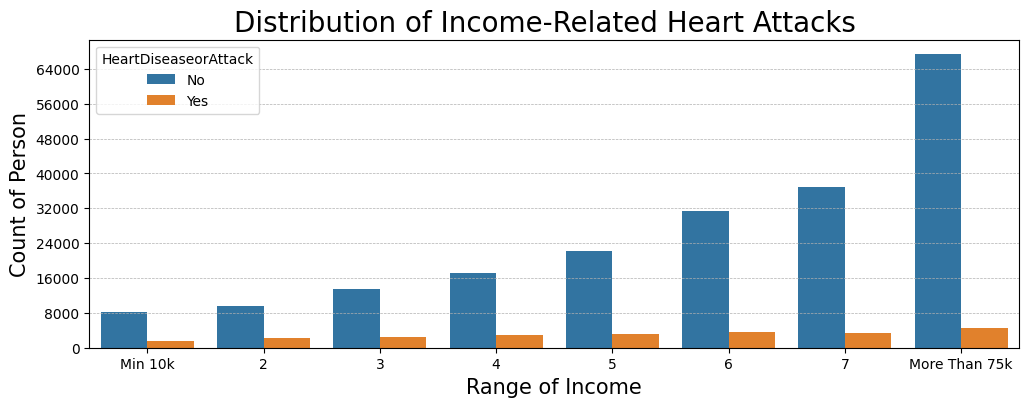

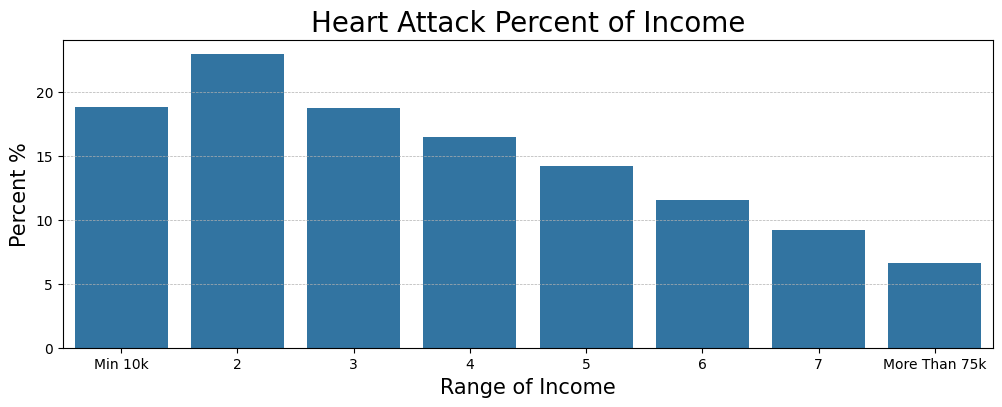

In [122]:
#income distubition
column = "Income"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "Min 10k","2","3","4","5","6","7","More Than 75k"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,72000,8000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,25,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

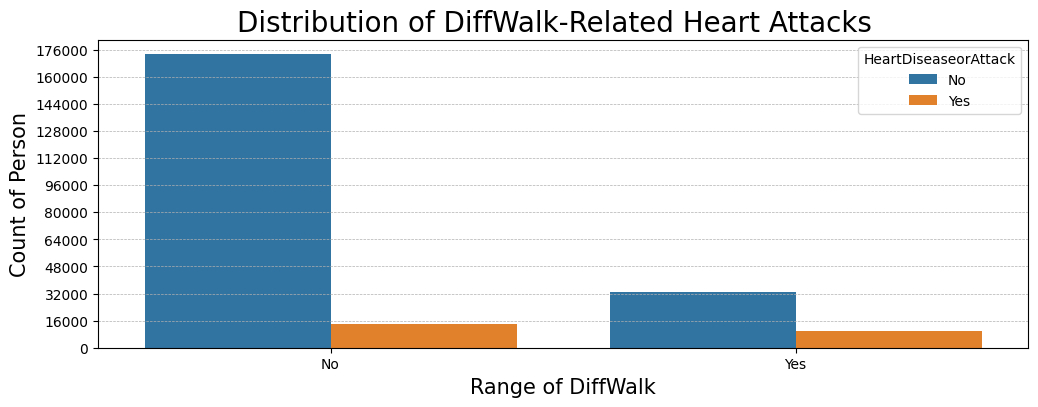

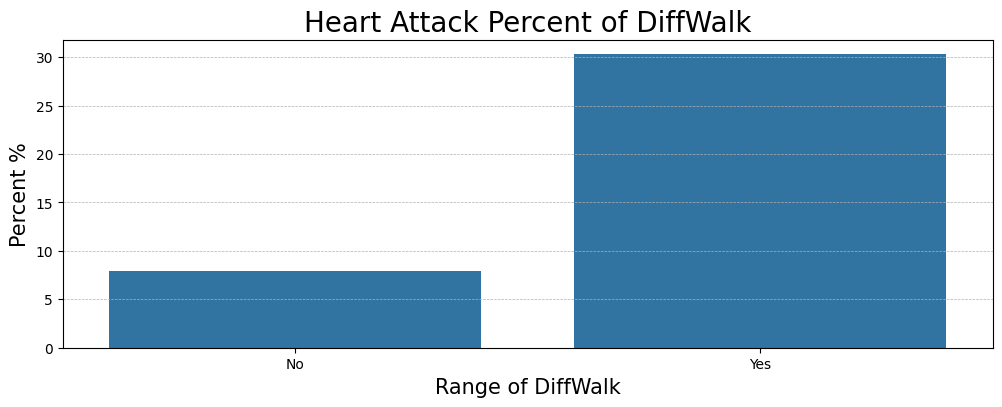

In [123]:
#DiffWalk distubition
# DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.

column = "DiffWalk"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,35,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

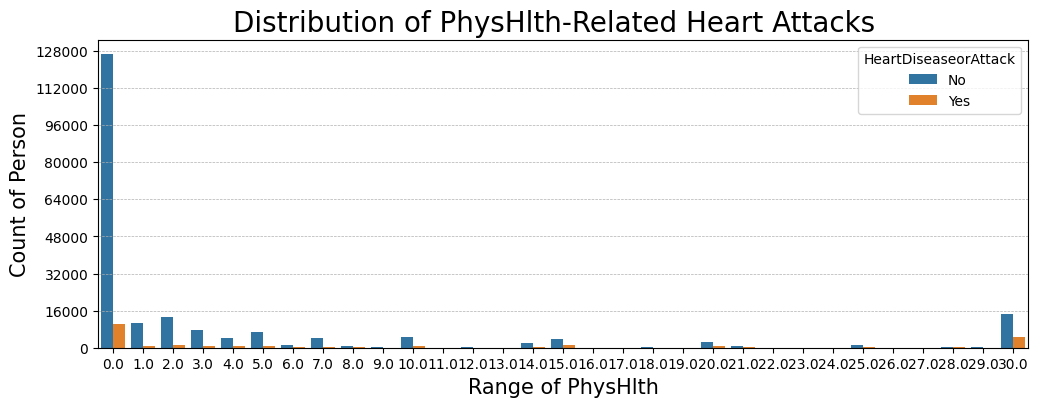

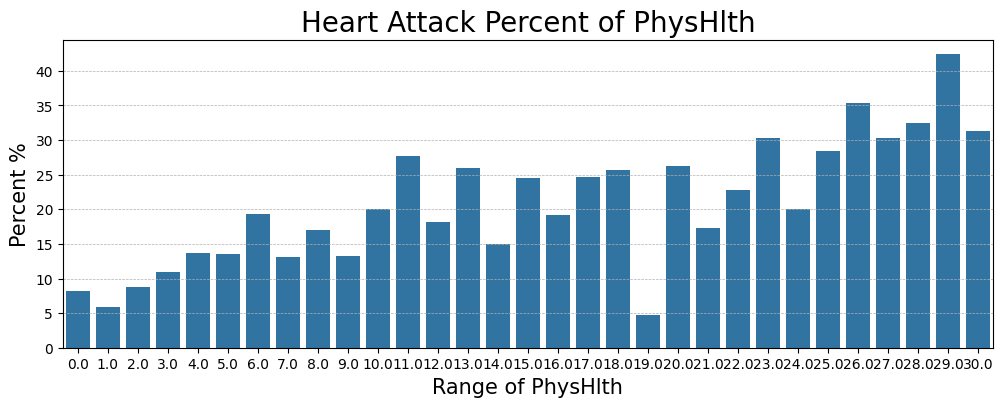

In [124]:
#PhysHlth distubition 
# PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.
column = "PhysHlth"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.yticks(range(0,130000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

grp_label = grp_data[column].unique()
percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,45,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()


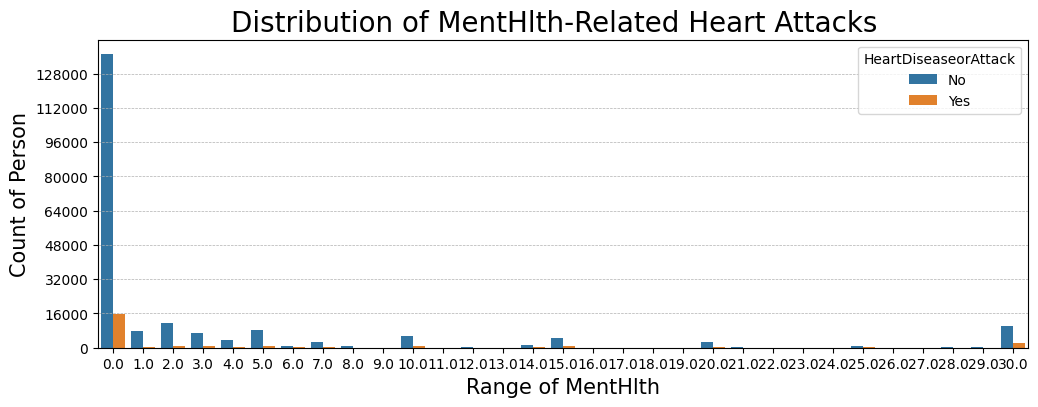

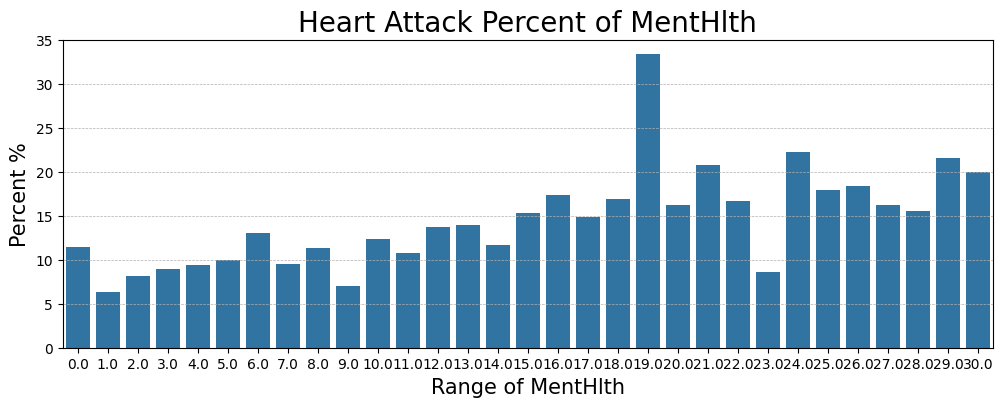

In [125]:
#MentHlth distubition
# Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.

column = "MentHlth"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.yticks(range(0,130000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

grp_label = grp_data[column].unique()
percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,40,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

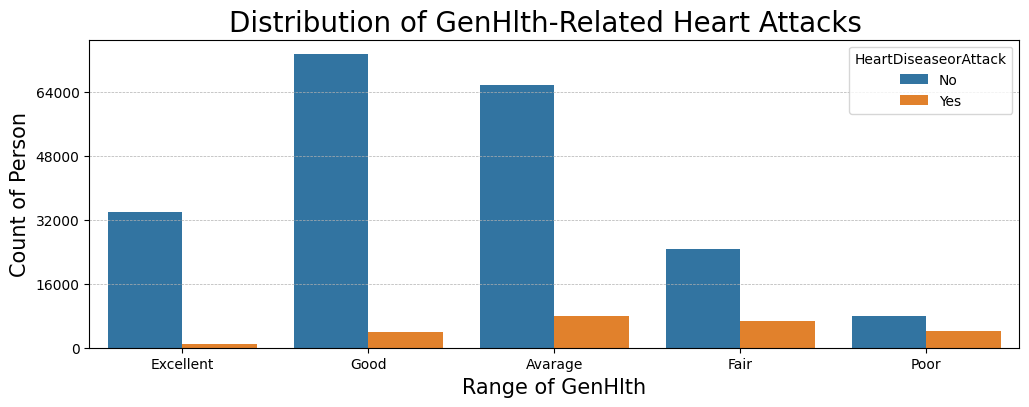

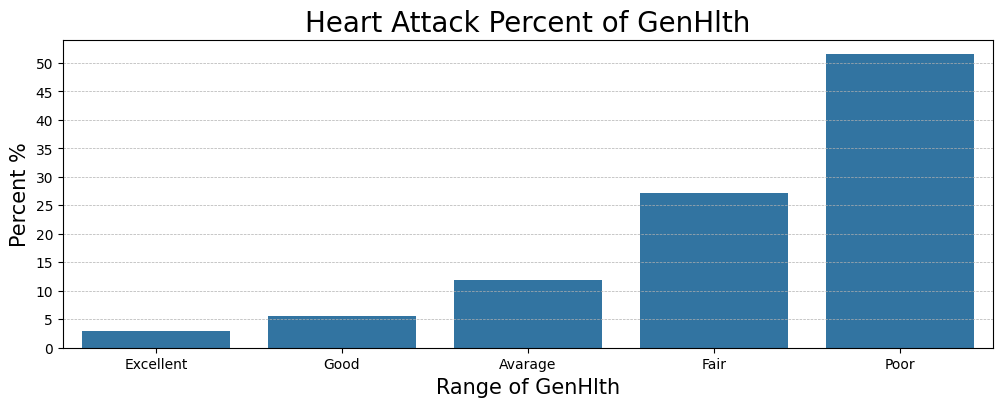

In [126]:
#GenHlth distubition
# GenHlth : Indicates the persons response to how well is their general health.

column = "GenHlth"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "Excellent","Good","Avarage","Fair","Poor"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,80000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,55,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

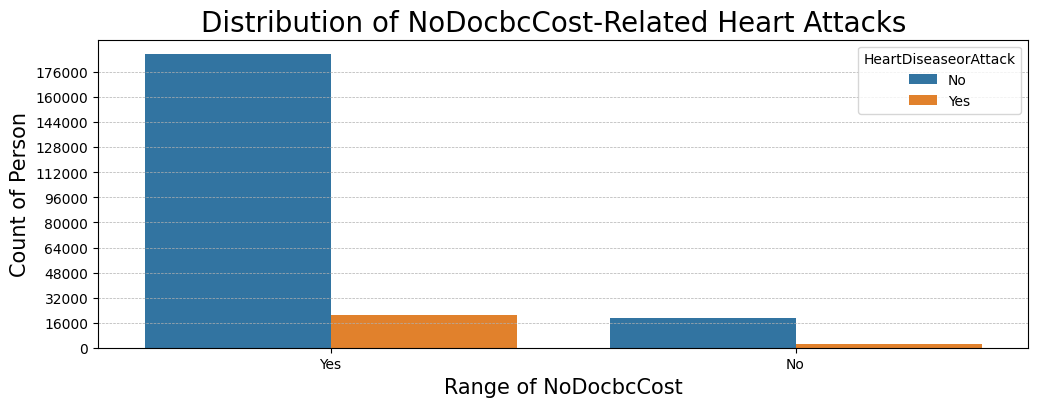

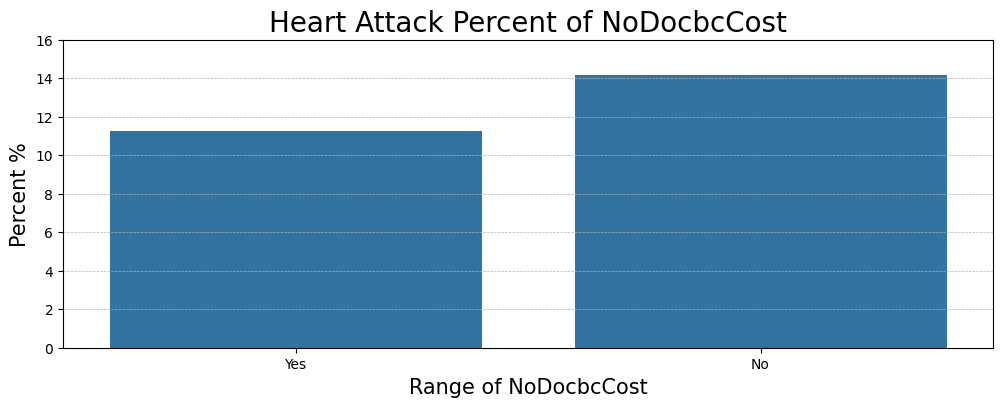

In [127]:
#NoDocbcCost distubition
# NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.

column = "NoDocbcCost"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "Yes","No"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,18,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

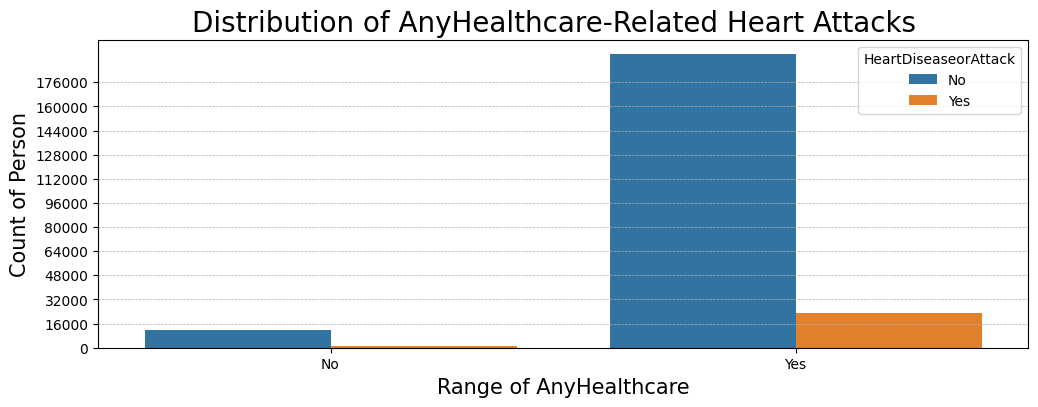

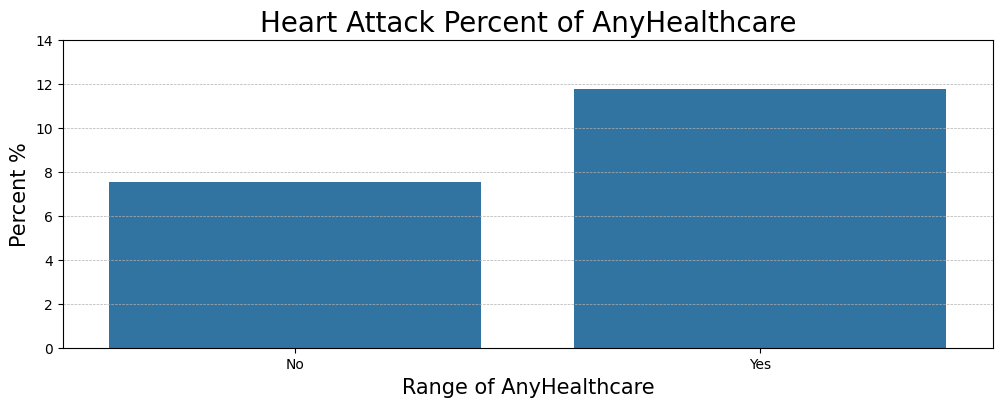

In [128]:
#AnyHealthcare distubition
# AnyHealthcare : Indicates if the person has any form of health insurance.

column = "AnyHealthcare"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,15,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

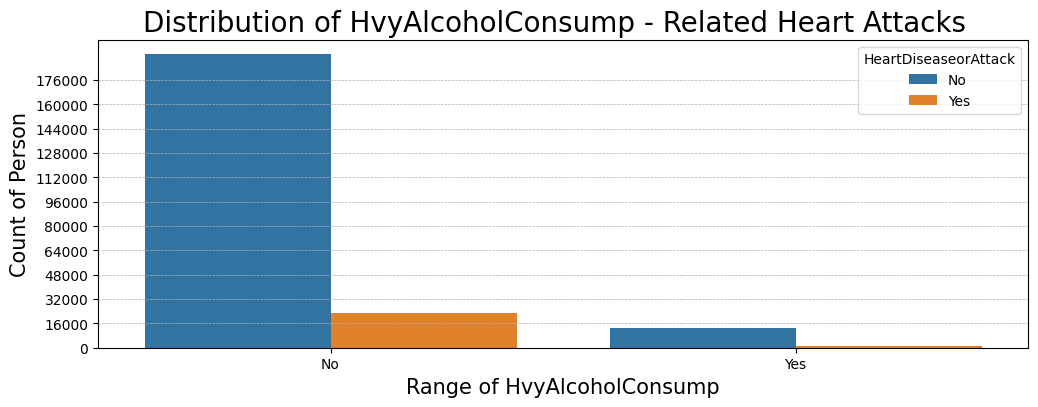

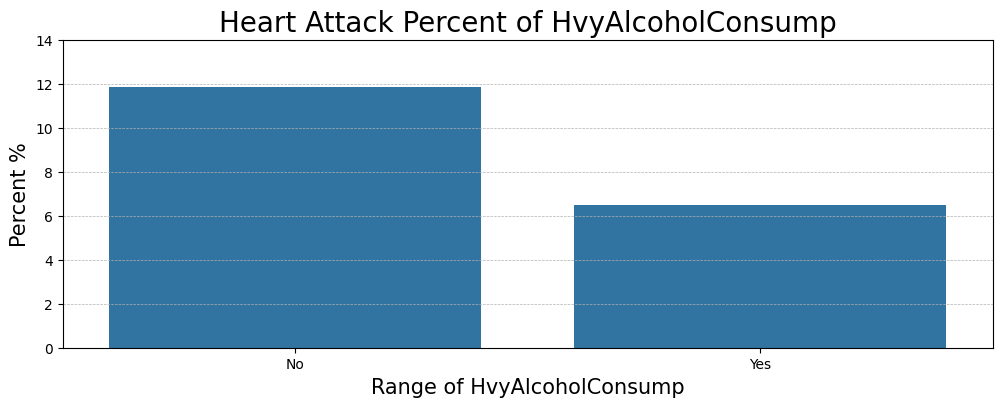

In [129]:
#HvyAlcoholConsump distubition
# HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.

column = "HvyAlcoholConsump"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column} - Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,15,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

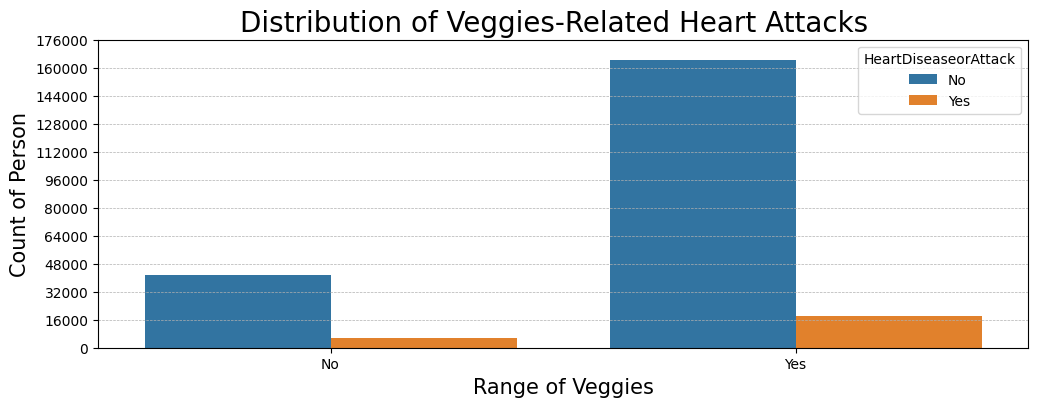

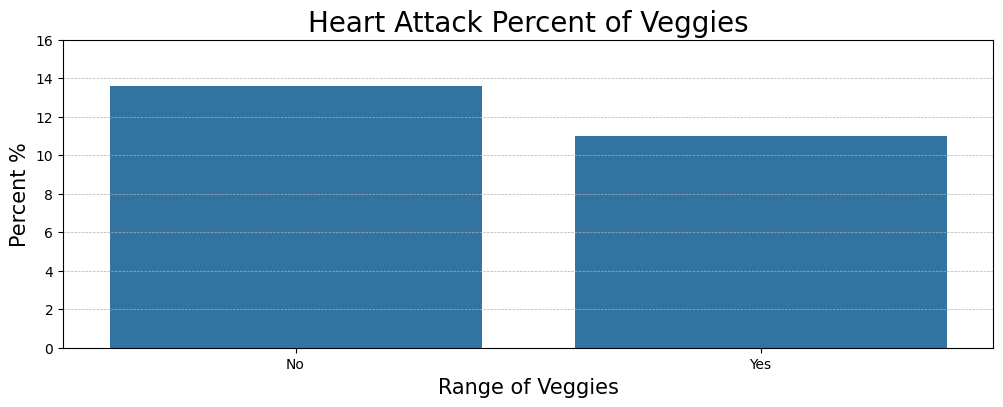

In [130]:
#Veggies distubition
# Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.
column = "Veggies"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,18,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

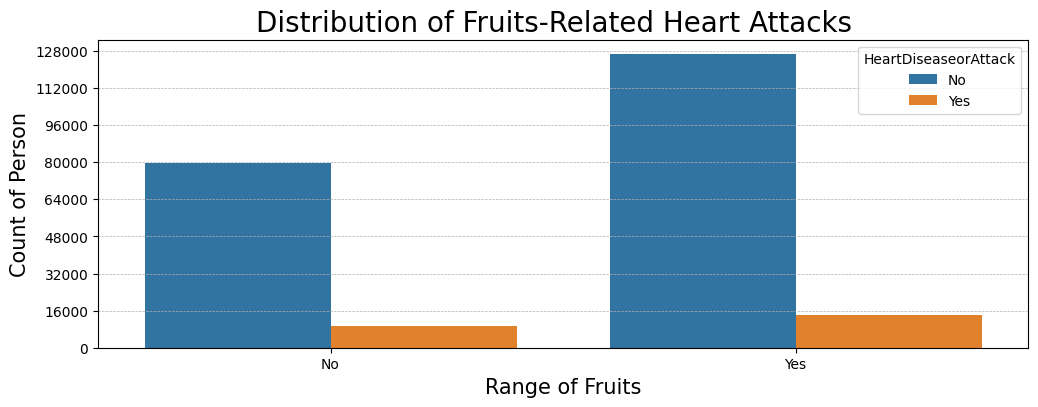

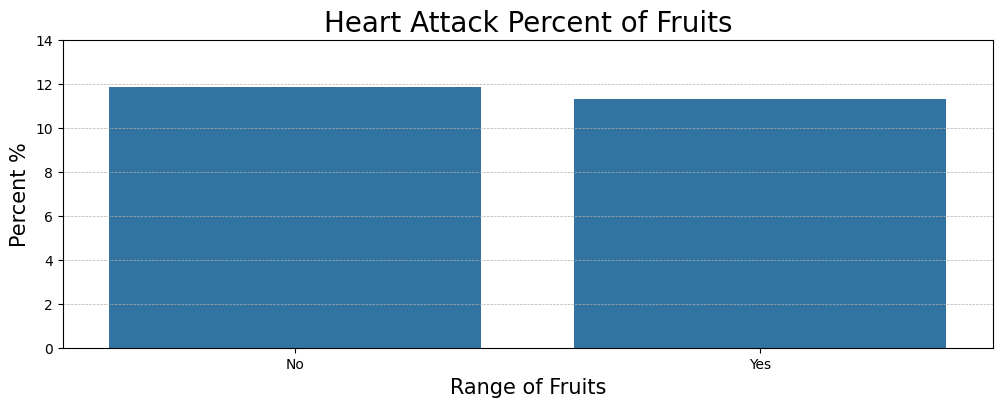

In [131]:
#Fruits distubition
# Fruits : Indicates if the person consumes 1 or more fruit(s) daily.

column = "Fruits"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,144000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,16,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

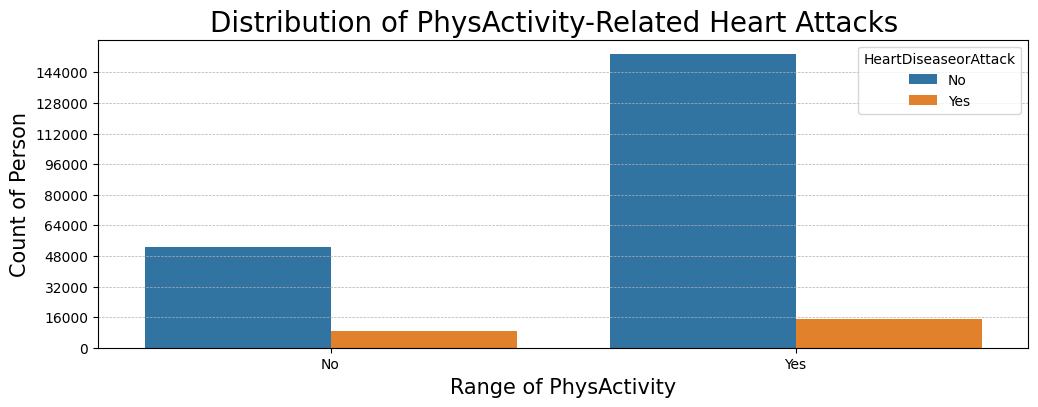

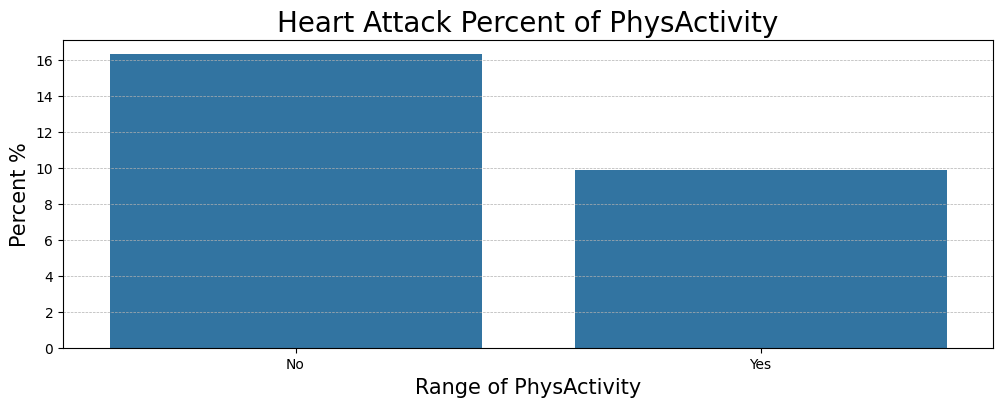

In [132]:
#PhysActivity distubition
# PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.

column = "PhysActivity"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,160000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,18,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

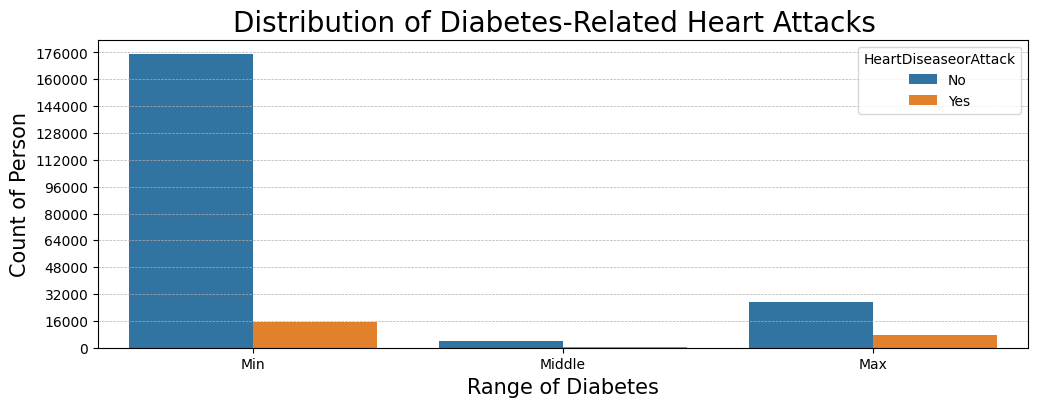

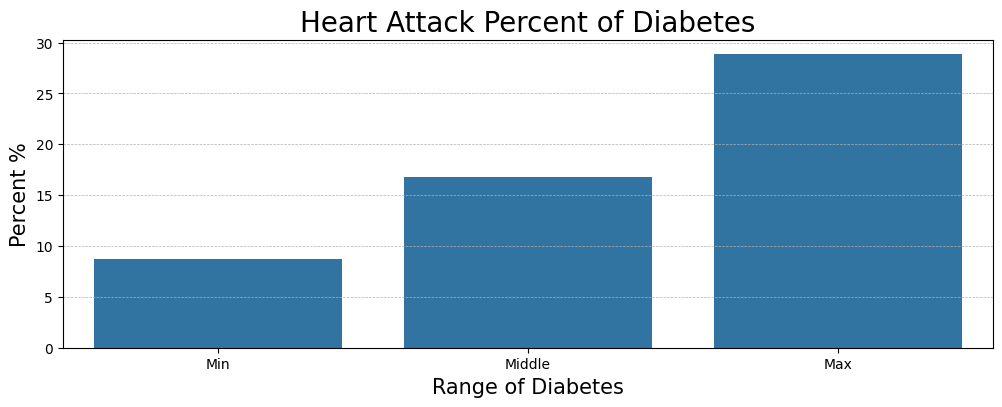

In [133]:
#Diabetes distubition
# Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.

column = "Diabetes"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "Min","Middle","Max"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,35,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

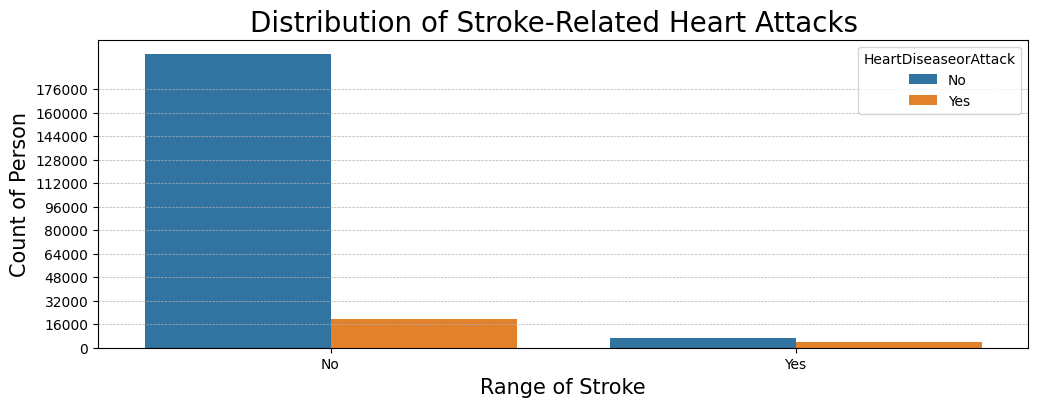

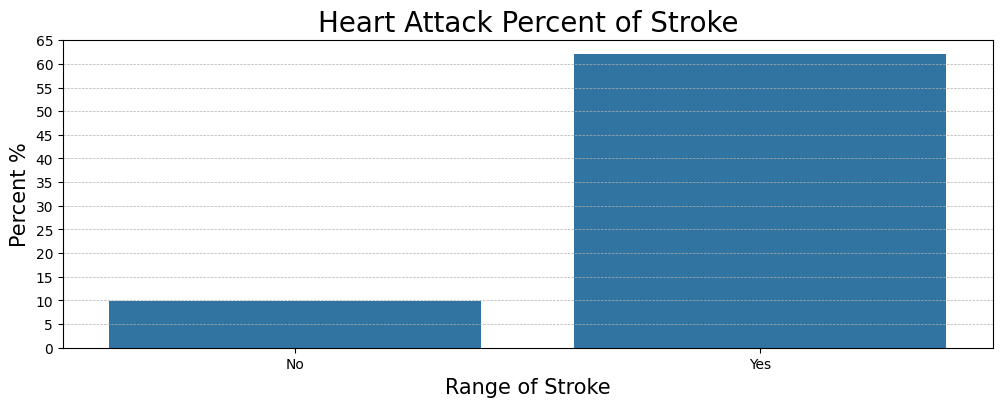

In [134]:
#Stroke distubition
# Stroke : Indicates if the person has a history of stroke.

column = "Stroke"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,180000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,70,5))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

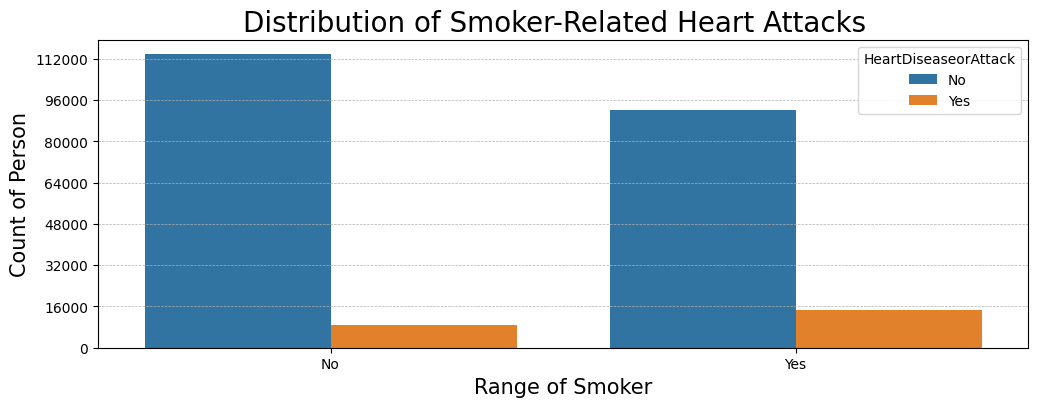

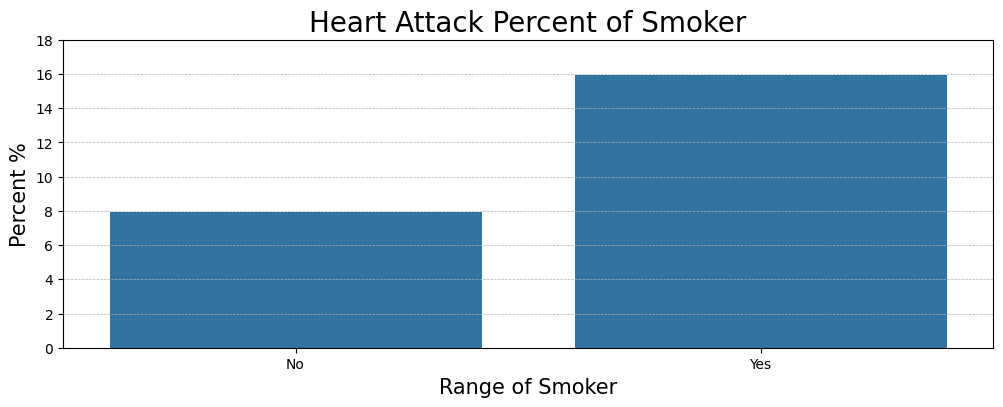

In [135]:
#Smoker distubition
# Smoker : Indicates if the person has smoked at least 100 cigarettes.

column = "Smoker"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,120000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,20,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

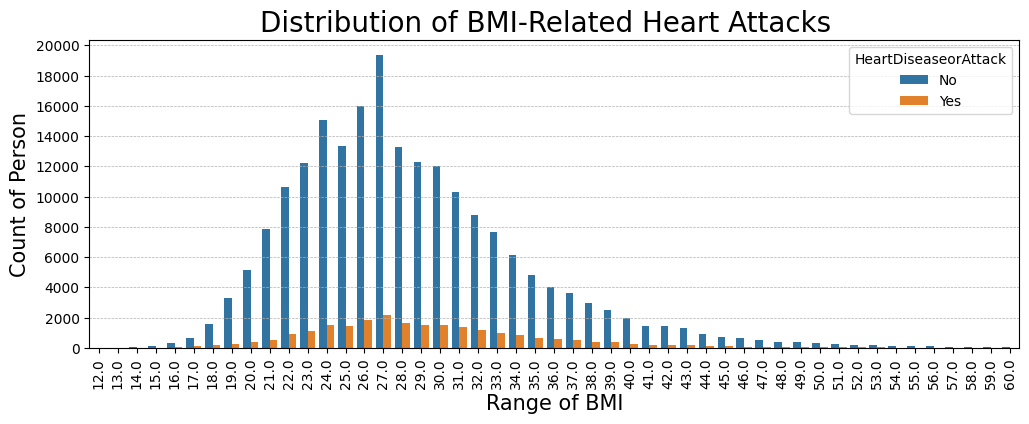

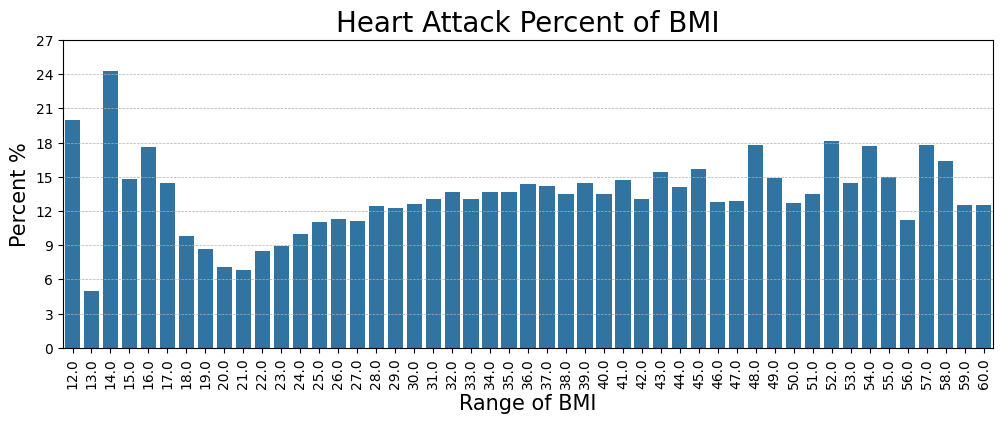

In [136]:
#BMI distubition
# BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).

column = "BMI"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]
grp_data = grp_data.drop(grp_data[grp_data["BMI"]>60].index,axis=0)

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(rotation=90)
plt.yticks(range(0,22000,2000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()

grp_label = grp_data[column].unique()
percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label,rotation=90)
plt.yticks(range(0,30,3))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

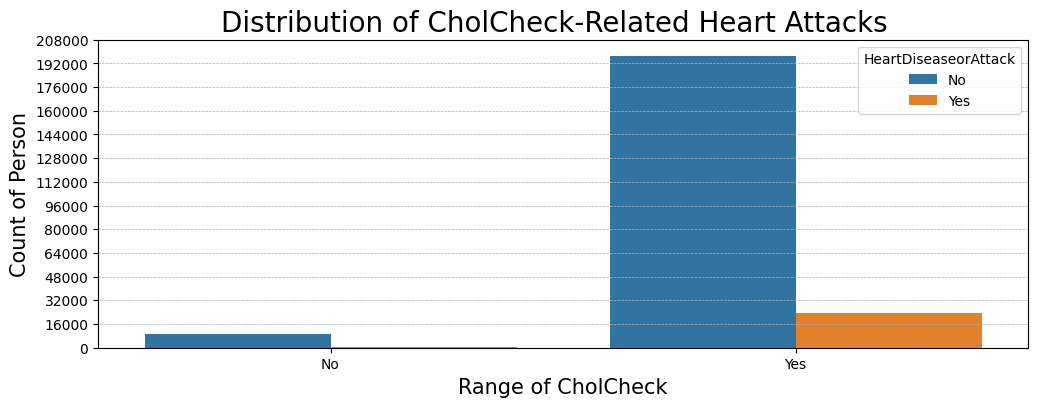

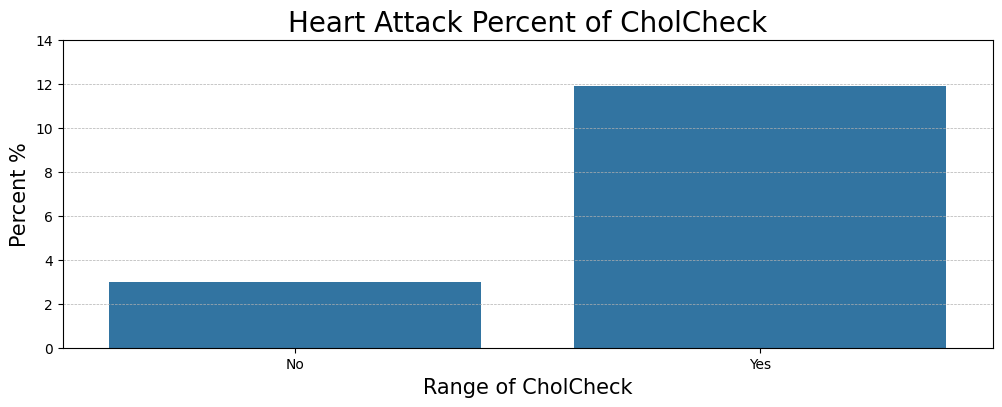

In [137]:
#CholCheck distubition
# CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.

column = "CholCheck"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,210000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()


percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,15,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()


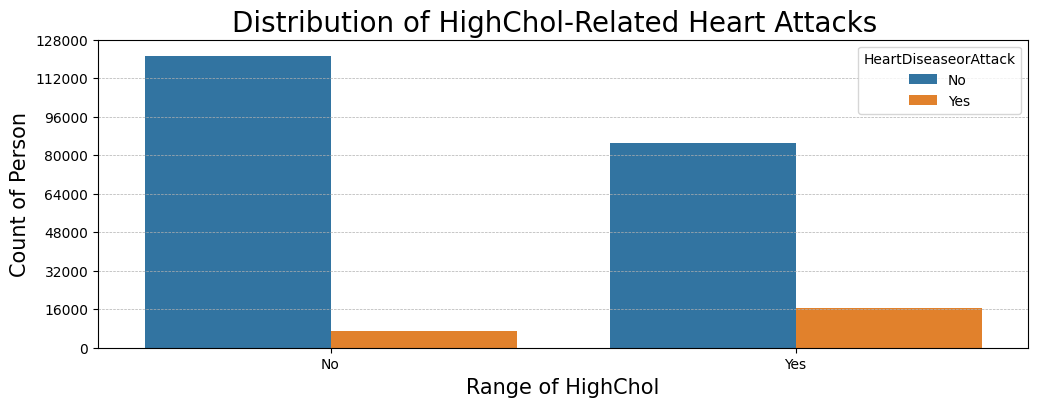

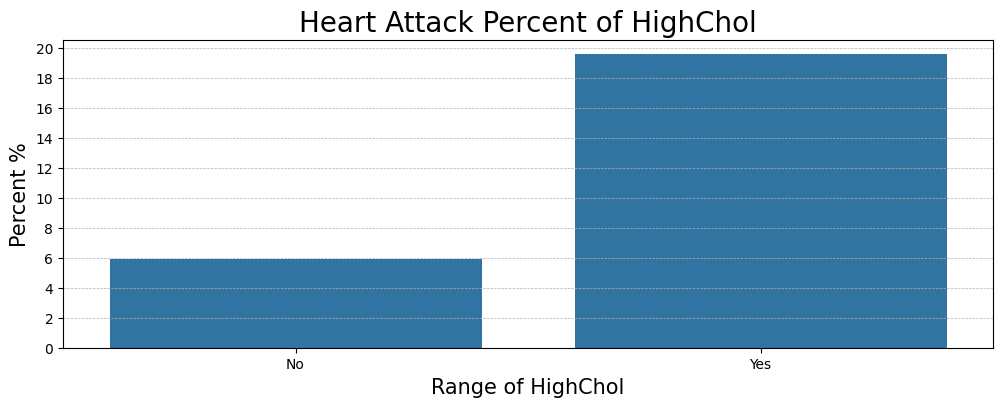

In [138]:
#HighChol distubition
# HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.

column = "HighChol"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,130000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()


percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,22,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

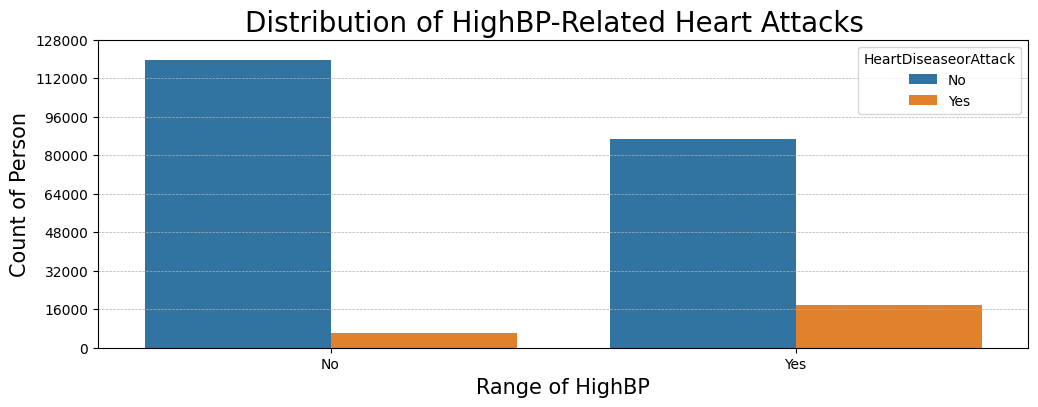

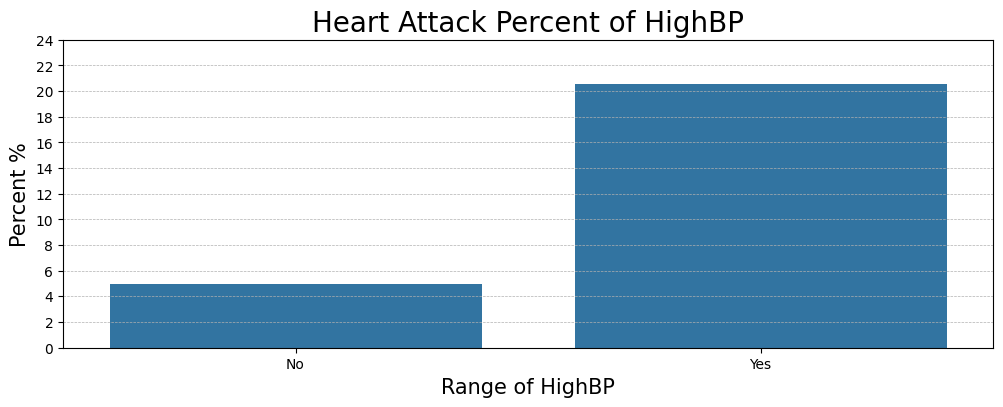

In [139]:
#HighBP distubition
# HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.

column = "HighBP"
grp_data = data.groupby([column,"HeartDiseaseorAttack"]).size().reset_index()
grp_label = [
            "No","Yes"
]

grp_data.columns = [column,"HeartDiseaseorAttack","Count"]

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot(data=grp_data, x=column, y='Count', hue="HeartDiseaseorAttack")
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Count of Person",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,130000,16000))
plt.title(f"Distribution of {column}-Related Heart Attacks  ",size=20)

plt.show()


percent = []
for i in range(0,len(grp_data.index),2):
    percent.append(((grp_data["Count"].iloc[i+1] / grp_data["Count"].iloc[i] )*100).round(2))

plt.figure(figsize=(12,4))
plt.grid(linestyle="--",linewidth=0.5)
sns.barplot( x=grp_label, y=percent)
plt.xlabel(f"Range of {column}",size=15)
plt.ylabel("Percent %",size=15)
plt.xticks(ticks=np.arange(len(grp_label)), labels=grp_label)
plt.yticks(range(0,25,2))
plt.title(f"Heart Attack Percent of {column}",size=20)
plt.show()

In [141]:
# Prepering data and separate data for model 
data.loc[data["HeartDiseaseorAttack"]=="No","HeartDiseaseorAttack"] = 0
data.loc[data["HeartDiseaseorAttack"]=="Yes","HeartDiseaseorAttack"] = 1
data["HeartDiseaseorAttack"] = pd.to_numeric(data["HeartDiseaseorAttack"])
X = data.drop("HeartDiseaseorAttack",axis=1)
y = data["HeartDiseaseorAttack"]

In [142]:
###xgboost,kfold,gridsearh

model = XGBClassifier()
k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
param = {
    "n_estimators" : [100,200,300], # 100,200,300
    "learning_rate" : [0.01,0.05,0.1], #0.01,0.05,0.1
    "max_depth" : [5,6,7], # 5,6,7
    "min_child_weight" : [0,1,2], #0123
    "subsample" : [0.1,0.5,1], # 0.1,0.5,1
    "colsample_bytree" : [0.1,0.5,1] # 0.1,0.5,1
}
gscv = GridSearchCV(estimator=model,param_grid=param,cv=k_fold,scoring="accuracy")
gscv.fit(X,y)
print(gscv.best_params_)
print(gscv.best_score_)

k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
model = XGBClassifier(**gscv.best_params_)

val_score = cross_val_score(estimator=model,X=X,y=y, cv=k_fold,scoring="accuracy")

mean_score = val_score.mean()
print(f"Ortalama Skor Yüzde {(mean_score*100).round(2)}")

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 1}
0.899412901425863
Ortalama Skor Yüzde 89.94


In [143]:
###catboost,kfold,gridsearh

model = CatBoostClassifier()
k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
param = {
    "n_estimators" : [100,200,300], # 100,200,300
    "learning_rate" : [0.01,0.05,0.1], #0.01,0.05,0.1
    "max_depth" : [5,6,7], # 5,6,7
    "subsample" : [0.1,0.5,1], # 0.1,0.5,1
    "verbose" : [0]
}
gscv = GridSearchCV(estimator=model,param_grid=param,cv=k_fold,scoring="accuracy")
gscv.fit(X,y)
print(gscv.best_params_)
print(gscv.best_score_)

k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
model = CatBoostClassifier(**gscv.best_params_)

val_score = cross_val_score(estimator=model,X=X,y=y, cv=k_fold,scoring="accuracy")

mean_score = val_score.mean()
print(f"Ortalama Skor Yüzde {(mean_score*100).round(2)}")

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1, 'verbose': 0}
0.8995739246348675
Ortalama Skor Yüzde 89.96


In [144]:
###lightgbm,kfold,gridsearh

model = LGBMClassifier()
k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
param = {
    "n_estimators" : [100,200,300], # 100,200,300
    "learning_rate" : [0.01,0.05,0.1], #0.01,0.05,0.1
    "max_depth" : [5,6,7], # 5,6,7
    "min_child_weight" : [0,1,2], #0123
    "subsample" : [0.1,0.5,1], # 0.1,0.5,1
    "colsample_bytree" : [0.1,0.5,1] # 0.1,0.5,1
}
gscv = GridSearchCV(estimator=model,param_grid=param,cv=k_fold,scoring="accuracy")
gscv.fit(X,y)
print(gscv.best_params_)
print(gscv.best_score_)

k_fold = KFold(shuffle=True , n_splits=6 , random_state=42)
model = LGBMClassifier(**gscv.best_params_)

val_score = cross_val_score(estimator=model,X=X,y=y, cv=k_fold,scoring="accuracy")

mean_score = val_score.mean()
print(f"Ortalama Skor Yüzde {(mean_score*100).round(2)}")

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.1}
0.899439012336262
Ortalama Skor Yüzde 89.94


In [ ]:
# RESULT 
# I got result from 3 different Boost model and for this data best one is Xgboost 
# I tried for all model parameters with GridSearch
# I used for all model best parameters from GridSearch 
# Kfold is gived me accuary its a better way for model understand accuary 
# All graph is gived information for understand data.
